Text(0.5, 1.0, 'Mean prices of airbnb accomodations in Seattle\n')

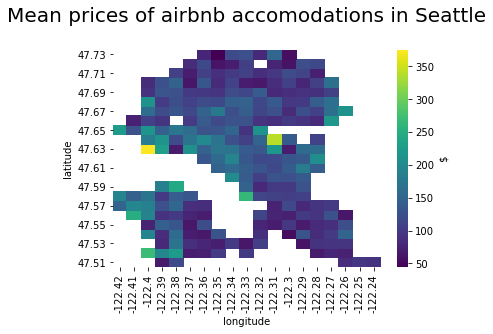

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

''' Question 1:
    We are interested in how the airbnb prices are distributed over the city.
    For that we group the accommodations by different locations and calculate 
    for each location the mean price 
'''

# Read in the data
df = pd.read_csv('listings.csv')

# For the next step we focus on the coordinate numbers. These are very accurate numbers with many digits. 
# To calculate the average of the price in certain regions we need some groups.
# One possibility is to round the coordinate numbers to 2 digits
df[['latitude','longitude']] = df[['latitude','longitude']].round(2)

# The price column is a string, so we need to change it to a float. 
# First we have to remove the "$" and "," sign
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Now we can create a pivot table from this new dataframe
# The mean prices has been calculated for all accomodations with the same coordinates
# A heatmap is created (the y-axis has to be inverted)
pivot = pd.pivot_table(df,values = 'price', aggfunc=np.mean, index = ['latitude'],columns = 'longitude')
ax = sns.heatmap(pivot,cmap = 'viridis',cbar_kws={'label': '$'})
ax.invert_yaxis()
ax.set_title('Mean prices of airbnb accomodations in Seattle\n',fontsize =20)